# Bike Sharing Assignment.

In [1]:
# Standard Libraries for EDA and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Libraries for Statistical Analysis and Regression
import statsmodels
import statsmodels.api as sm

#Splitting data
import sklearn
from sklearn.model_selection import train_test_split

#Mean Squared Error
from sklearn.metrics import mean_squared_error

#R2 score
from sklearn.metrics import r2_score

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
Bike1 = pd.read_csv('day.csv')

In [3]:
Bike1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking weather all columns are populated
#Bike1.info()
Bike1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data understanding, preparation and EDA

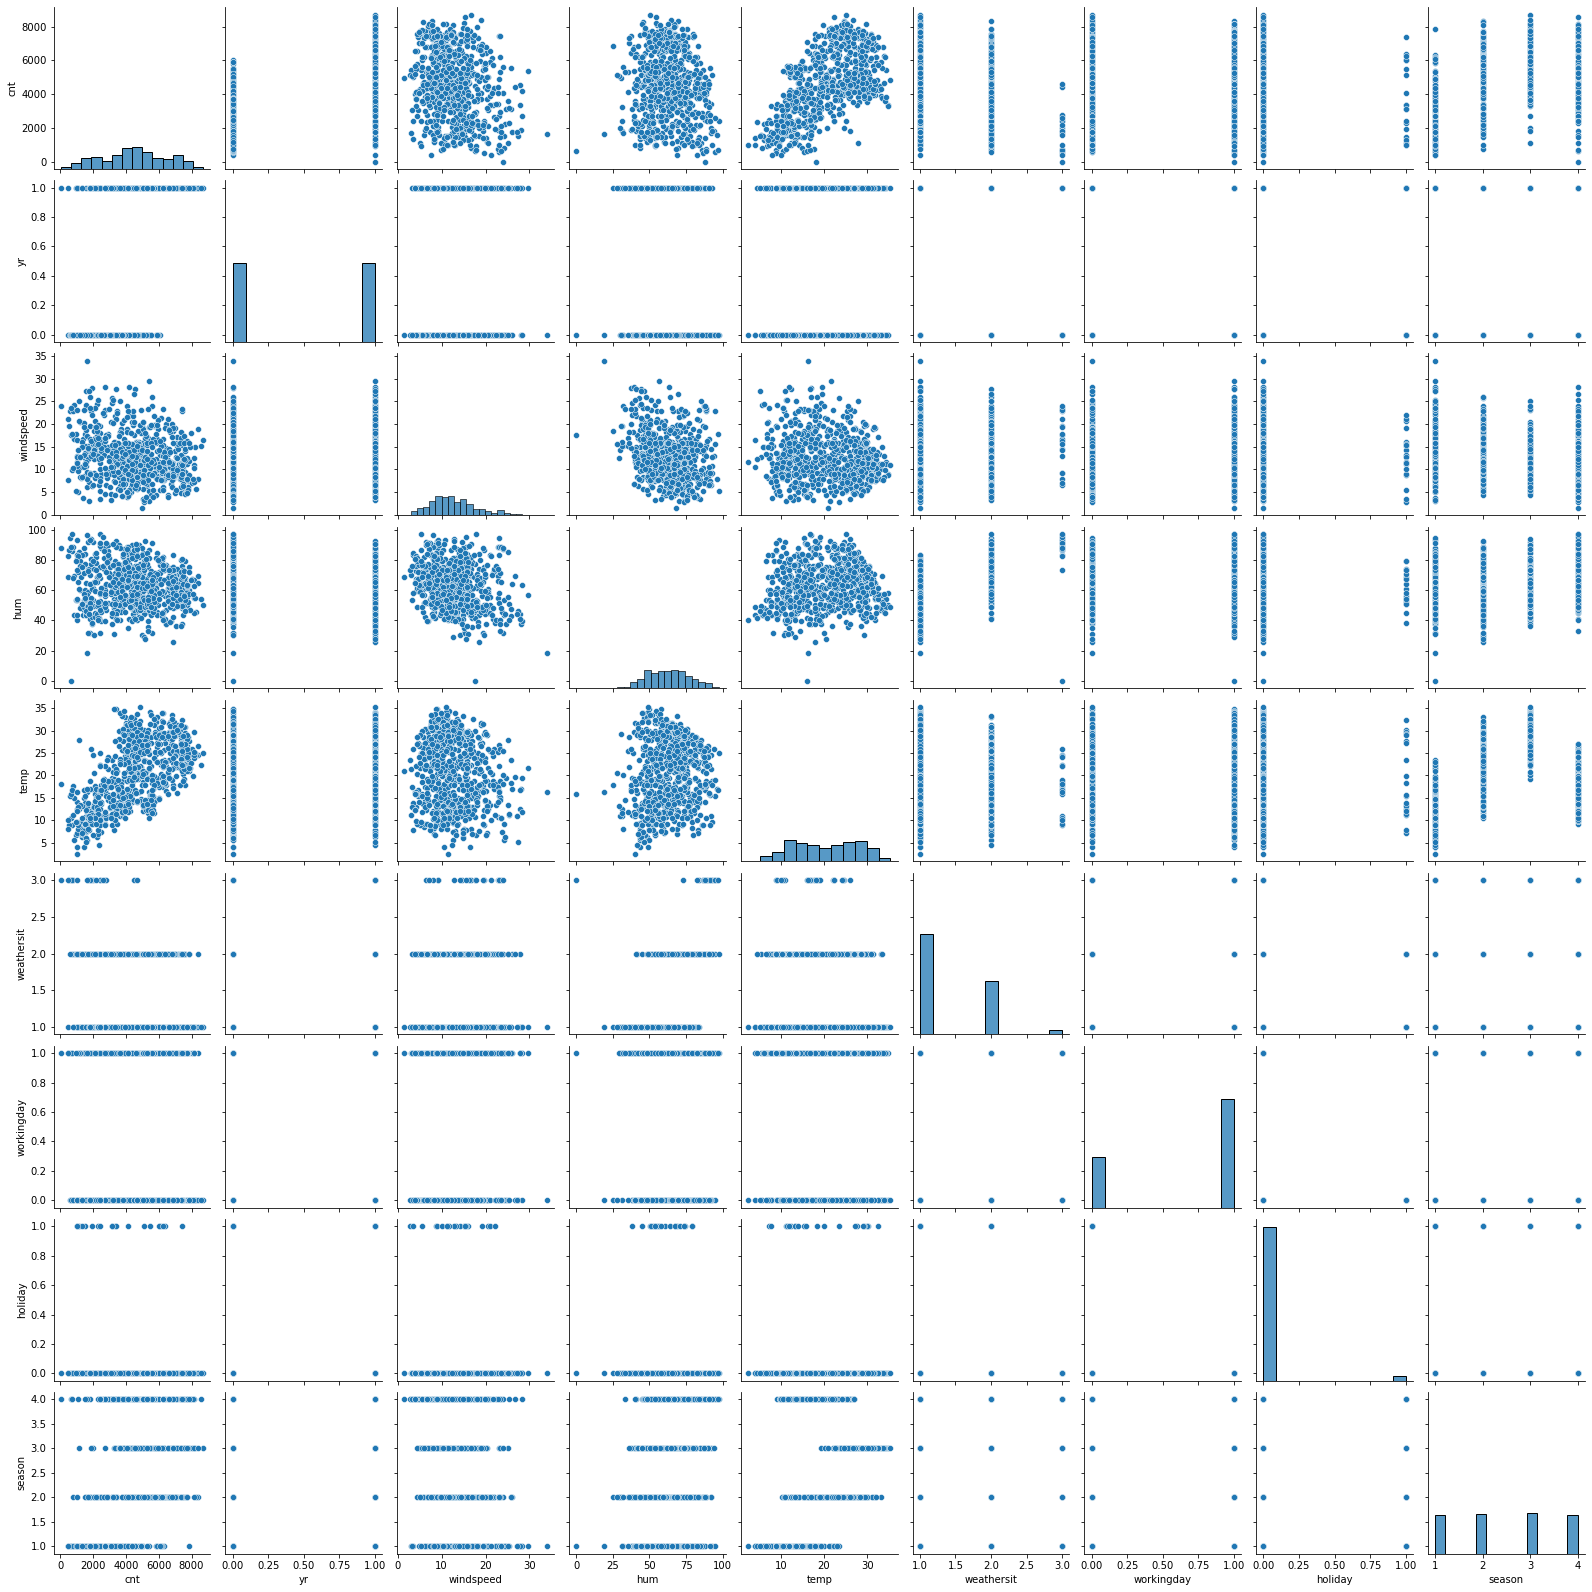

In [5]:
# First drawing pairplots to let us know if Linear relation can be drawn against 'cnt' as or target variable
sns.pairplot(Bike1[['cnt','yr', 'windspeed','hum','temp','weathersit','workingday','holiday','season']])
plt.show()

In [6]:
Bike1.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


***_After Drawing pairplots to see relations between Target and independent variables we see that our model will 
perceive 'season', 'mnth' and 'Weathersit' as incremental values._***

We need to convert them into dummy variables for accurate representation

In [7]:
#Before creating dummy variable lets convert these numerical variable to represent their actual values.
#- season : season (1:spring, 2:summer, 3:fall, 4:winter)
Bike1.season = Bike1.season.apply(lambda x: 'spring' if (x==1) else('summer' if (x==2) else('fall' if (x==3) else('winter' if (x==4) else x))))
Bike1.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [8]:
#weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Bike1.weathersit = Bike1.weathersit.apply(lambda x: 'clear' if (x==1) else('misty' if (x==2) else('L_snow' if (x==3) else('H_rain' if (x==4) else x))))
Bike1.weathersit.value_counts()

clear     463
misty     246
L_snow     21
Name: weathersit, dtype: int64

In [9]:
#mnth :
#- mnth : month ( 1 to 12)
# Doing it conversion in 4 Quarters to get better business understanding.
Bike1.mnth = Bike1.mnth.apply(lambda x: 'Q1' if (x==1 or x==2 or x==3) else('Q2' if (x==4 or x==5 or x==6) else('Q3' if (x==7 or x==8 or x==9) else('Q4' if (x==10 or x==11 or x==12) else x))))
#Bike1.mnth = Bike1.mnth.apply(lambda x: 'may' if (x==5) else('jun' if (x==6) else('july' if (x==7) else('aug' if (x==8) else x))))
#Bike1.mnth = Bike1.mnth.apply(lambda x: 'sept' if (x==9) else('oct' if (x==10) else('nov' if (x==11) else('dec' if (x==12) else x))))
Bike1.mnth.value_counts()

Q3    184
Q4    184
Q2    182
Q1    180
Name: mnth, dtype: int64

In [10]:
Bike1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Q1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Q1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Q1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Q1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Q1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Now that we have new orginial values populated for our understanding let us create dummy variables on the same.
#Based on our understanding we are dropping Fall variable to make our total dummy variables (n-1) 
#Our data will perceive season as fall when all other seasons are 0
dum_season = pd.get_dummies(Bike1['season'], drop_first= True)
dum_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [12]:
# Concatinating this dummy variable with original Dataframe and dropping the initial variable.
Bike1 = pd.concat([Bike1,dum_season], axis = 1)
Bike1 = Bike1.drop('season', axis = 1)

In [13]:
#Same with weathersit Variable
dum_weather = pd.get_dummies(Bike1['weathersit'], drop_first= True)
dum_weather.head()
Bike1 = pd.concat([Bike1,dum_weather], axis = 1)
Bike1 = Bike1.drop('weathersit', axis = 1)
Bike1.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,clear,misty
0,1,01-01-2018,0,Q1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,Q1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,Q1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0
3,4,04-01-2018,0,Q1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0
4,5,05-01-2018,0,Q1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0


In [14]:
#Same with mnth Variable
dum_mnth = pd.get_dummies(Bike1['mnth'], drop_first= True)
dum_mnth.head()
Bike1 = pd.concat([Bike1,dum_mnth], axis = 1)
Bike1 = Bike1.drop('mnth', axis = 1)
Bike1.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,registered,cnt,spring,summer,winter,clear,misty,Q2,Q3,Q4
0,1,01-01-2018,0,0,6,0,14.110847,18.18125,80.5833,10.749882,...,654,985,1,0,0,0,1,0,0,0
1,2,02-01-2018,0,0,0,0,14.902598,17.68695,69.6087,16.652113,...,670,801,1,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,1,8.050924,9.47025,43.7273,16.636703,...,1229,1349,1,0,0,1,0,0,0,0
3,4,04-01-2018,0,0,2,1,8.200000,10.60610,59.0435,10.739832,...,1454,1562,1,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,3,1,9.305237,11.46350,43.6957,12.522300,...,1518,1600,1,0,0,1,0,0,0,0


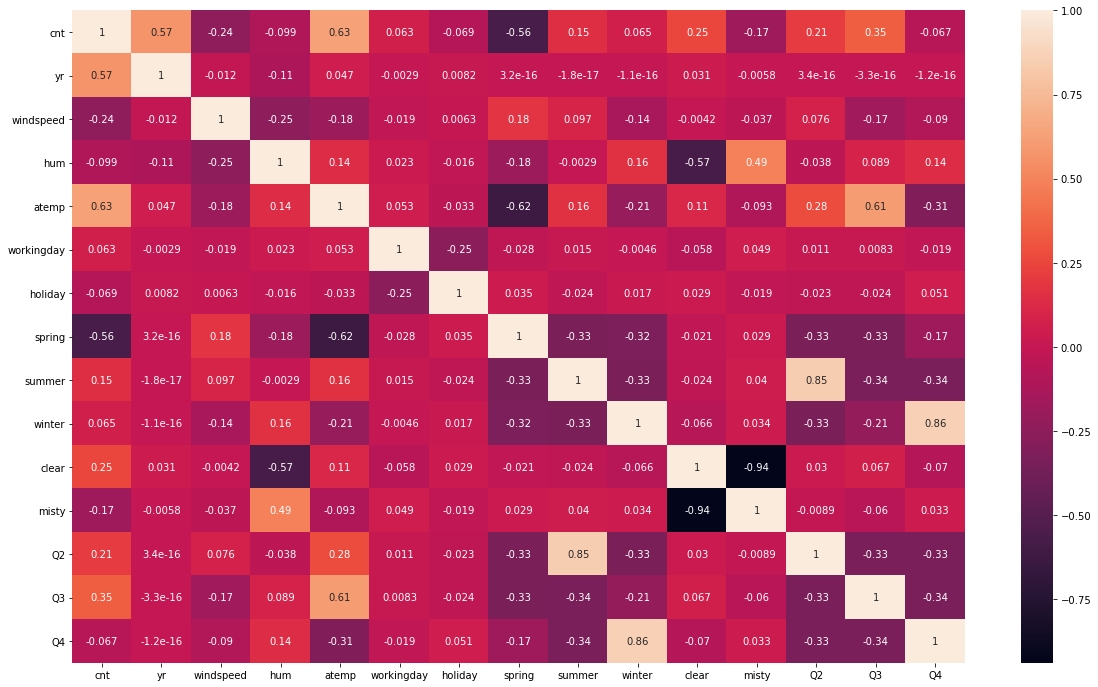

In [15]:
#Bike1.head()
# Drawing Heatmap to let us know the correlation against 'cnt' and indpendent variables
#sns.pairplot(Bike1[['cnt','windspeed','hum','atemp','workingday','holiday','spring','summer','winter','clear','misty']])

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(Bike1[['cnt','yr','windspeed','hum','atemp','workingday','holiday','spring','summer','winter','clear','misty','Q2','Q3','Q4']].corr(), annot= True, ax=ax)
plt.show()

## Model building and evaluation 

### Assumptions
- As our Problem Statement is focus on predicting the total counts of bikes needed we are currently ignoring casual and Registered users and focusing on total.
- In order to have best of both worlds(Manual and Automated model) we will perform RFE algorithm i.e. automated process and then use backwards selection to optimize our output based on Adjusted R2 and VIF modules.
- Based on the data in training set, I believe Scaling is not much needed as we have all data in similar ranges.
- It may look like I have skipped some steps while fine tuning our model but I have worked on those steps and purposefully not displaying them as I dont want our code to look messy.

In [16]:
#Train and Test splits and scaling our data.
#Making 70-30 split to aviod overfitting on our data.
Bike_train, Bike_test = train_test_split(Bike1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
Bike_train.describe()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,clear,misty,Q2,Q3,Q4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.941176,0.507843,0.025490,2.990196,0.676471,20.102429,23.493909,63.112926,12.831318,837.543137,3648.839216,4486.382353,0.243137,0.245098,0.24902,0.627451,0.343137,0.237255,0.252941,0.256863
std,209.868619,0.500429,0.157763,2.017093,0.468282,7.431169,8.090038,14.156632,5.291832,675.921998,1580.336986,1952.158739,0.429398,0.430568,0.43287,0.483958,0.475223,0.425818,0.435124,0.437332
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,2.000000,20.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,1.000000,0.000000,13.606865,16.603063,52.270825,9.041918,311.000000,2468.250000,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,3.000000,1.000000,20.209597,24.020400,63.437500,12.083182,700.000000,3657.000000,4530.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,553.750000,1.000000,0.000000,5.000000,1.000000,26.615847,30.177700,73.250025,15.750879,1076.250000,4841.000000,5973.500000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000
max,729.000000,1.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.041700,34.000021,3283.000000,6946.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Feeding independent and Dependent features in our train variables
y_train = Bike_train.pop('cnt')
X_train = Bike_train
X_train.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,clear,misty,Q2,Q3,Q4
653,654,16-10-2019,1,0,2,1,19.201653,23.0423,55.8333,12.208807,922,6612,0,0,1,1,0,0,0,1
576,577,31-07-2019,1,0,2,1,29.246653,33.1448,70.4167,11.083475,968,6248,0,0,0,1,0,0,1,0
426,427,03-03-2019,1,0,6,0,16.980847,20.6746,62.1250,10.792293,956,3110,1,0,0,0,1,0,0,0
728,729,30-12-2019,1,0,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1,0,0,1,0,0,0,1
482,483,28-04-2019,1,0,6,0,15.443347,18.8752,48.9583,8.708325,1120,3100,0,1,0,0,1,1,0,0


In [19]:
# Dropping Casual and Registered Features as they are part of target data.
X_train = X_train.drop(['registered','casual'], axis = 1)

In [20]:
#Droping dteday and Instant variables as it makes no sense having them as a feature
X_train = X_train.drop(['dteday','instant'], axis = 1)

In [21]:
# RFE to gauge top 10 featurew to be used in our study. We will keep adding and removing more features going forward.
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,10)		# running rfe
rfe = rfe.fit(X_train,y_train)

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [22]:
# Ranking our features based on RFE we will use these ranks to perform our analysis.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 2),
 ('temp', False, 3),
 ('atemp', False, 6),
 ('hum', False, 7),
 ('windspeed', False, 5),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('misty', True, 1),
 ('Q2', True, 1),
 ('Q3', True, 1),
 ('Q4', True, 1)]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'spring', 'summer', 'winter', 'clear', 'misty', 'Q2',
       'Q3', 'Q4'],
      dtype='object')

In [24]:
X_train_sm =  sm.add_constant(X_train[['yr', 'holiday', 'spring', 'summer', 'winter', 'clear', 'misty', 'Q2',
       'Q3', 'Q4']])
X_train_sm.head()

,const,yr,holiday,spring,summer,winter,clear,misty,Q2,Q3,Q4
653,1.0,1,0,0,0,1,1,0,0,0,1
576,1.0,1,0,0,0,0,1,0,0,1,0
426,1.0,1,0,1,0,0,0,1,0,0,0
728,1.0,1,0,1,0,0,1,0,0,0,1
482,1.0,1,0,0,1,0,0,1,1,0,0


In [25]:
#create first model
lr = sm.OLS(y_train, X_train_sm)

#Fitting the model
lr_model=lr.fit()

#Checking model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.84e-147
Time:                        18:17:25   Log-Likelihood:                -4224.5
No. Observations:                 510   AIC:                             8471.
Df Residuals:                     499   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1054.4199    368.365      2.862      0.004     330.683    1778.157
yr          2116.6778     86.175     24.562      0.000    1947.367    2285.989
holiday     -790.1614    273.960     -2.884      0.004   -1328.418    -251.905
spring     -1678.9509    283.049     -5.932      0.000   -2235.066   -1122.836
summer      -327.3025    242.528     -1.350      0.178    -803.805     149.200
winter       610.1425    272.173      2.242      0.025      75.395    1144.889
clear       2587.0675    258.946      9.991      0.000    2078.308    3095.827
misty       1845.2397    262.910      7.019      0.000    1328.693    2361.787
Q2          1002.3086    223.384      4.487      0.000     563.419    1441.199
Q3          1207.2572    282.479      4.274      0.000     652.263    1762.252
Q4          -334.5501    247.083     -1.354      0.176    -820.001     150.901
==============================================================================
Omnibus:                       38.099   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.311
Skew:                          -0.240   Prob(JB):                     8.33e-29
Kurtosis:                       5.420   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Checking VIF for these columns
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif


,Features,VIF
0,const,73.85
6,clear,8.53
7,misty,8.48
9,Q3,8.21
3,spring,8.02
5,winter,7.54
10,Q4,6.34
4,summer,5.92
8,Q2,4.91
1,yr,1.01


### Fine tuning our model not showing all the steps here. I have noted down all the steps I performed below.
- Removing summer and Q4 as they have high P-value and high VIF.
- Removing 'clear' as it has high VIF.
- Adding Workingday and temperature to see what impact do they on our model.
- Removing Working day due to high p-value.
- Adding windspeed to see it's impact on our model.
- Removing summer and Q3 as it has high P-value and high VIF.
- Finally adding atemp and hum to see its impact on data.
- Removing both atemp and hum as they have extremely high VIF i.e. 54 and 52.

In [27]:

X_train_sm =  sm.add_constant(X_train[['yr', 'holiday', 'spring', 'winter', 'misty', 'Q2',
       'temp','windspeed']])

X_train_sm.head()
#create first model
lr = sm.OLS(y_train, X_train_sm)

#Fitting the model
lr_model=lr.fit()

#Checking model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.40e-159
Time:                        18:17:25   Log-Likelihood:                -4201.8
No. Observations:                 510   AIC:                             8422.
Df Residuals:                     501   BIC:                             8460.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1918.3492    283.138      6.775      0.000    1362.064    2474.634
yr          2087.2090     82.451     25.315      0.000    1925.217    2249.201
holiday     -658.7276    260.949     -2.524      0.012   -1171.417    -146.038
spring      -800.7457    174.036     -4.601      0.000   -1142.675    -458.816
winter       470.9249    143.525      3.281      0.001     188.939     752.911
misty       -542.6967     86.903     -6.245      0.000    -713.437    -371.957
Q2           271.6284    119.823      2.267      0.024      36.211     507.045
temp         117.6308      8.921     13.186      0.000     100.104     135.158
windspeed    -49.9262      8.014     -6.230      0.000     -65.672     -34.181
==============================================================================
Omnibus:                      120.525   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.343
Skew:                          -1.064   Prob(JB):                     1.75e-90
Kurtosis:                       6.863   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Checking VIF for finalized columns
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,const,47.88
3,spring,3.33
7,temp,2.62
4,winter,2.30
6,Q2,1.55
8,windspeed,1.07
5,misty,1.02
1,yr,1.01
2,holiday,1.01


***_Thus we have finalized our model using only 9 features and all of them have significant impact on predictive analysis_***

Our finalized R^2 for test model is 0.785 and Adjusted R^2 is 0.781.

In [29]:
# Time to check our outcome on text cases

#Creating X & y test
y_test = Bike_test.pop('cnt')
X_test = Bike_test

X_test.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,clear,misty,Q2,Q3,Q4
184,185,04-07-2018,0,1,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,0,0,0,0,1,0,1,0
535,536,20-06-2019,1,0,3,1,32.082500,36.04875,59.2083,7.625404,872,5339,0,1,0,1,0,1,0,0
299,300,27-10-2018,0,0,4,1,19.270000,22.85230,81.2917,13.250121,240,2419,0,0,1,0,1,0,0,1
221,222,10-08-2018,0,0,3,1,31.433347,34.24915,42.4167,13.417286,884,3896,0,0,0,1,0,0,1,0
152,153,02-06-2018,0,0,4,1,29.315000,32.19710,30.5000,19.583229,736,4232,0,1,0,1,0,1,0,0


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

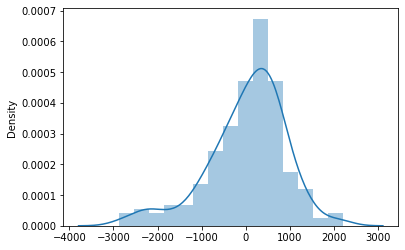

In [30]:
#Creating X_test_sm using all the finalized features we have.
X_test_sm =  sm.add_constant(X_test[['yr', 'holiday', 'spring', 'winter', 'misty', 'Q2',
       'temp','windspeed']])

# Calculating/Checking Residuals to ensure our plot is fit perfectly and errors are normally distribted with mean as 0.

y_test_pred = lr_model.predict(X_test_sm)
res = y_test - y_test_pred
sns.distplot(res)

In [32]:
#calculating meansquarederror for Test model
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

800671.5730880023

In [31]:
#calculating R2 for Test model

R2 = r2_score(y_true=y_test, y_pred=y_test_pred)
R2

0.7768691125785836

### As you can see there is not much difference in variance in train and test model i.e. 0.779 and 0.777. :)